<a href="https://colab.research.google.com/github/evelyn41/Ciencia-de-datos/blob/main/IDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INDICACIONES IDA**

**Descripción de los datos, procesamiento, limpieza y consolidación**

Debido a que se requiere implementar una metodología para identificar los patrones que conllevan a la cancelación de una póliza de automóvil se necesita un consolidado de registros que presente tanto las variables sociodemográficas de las personas afiliadas y retiradas, así como las características del ítem asegurado y la fecha de retiro o afiliación para determinar el tiempo de permanencia a la compañía. Dados estos dos conjuntos que funcionan como insumo para realizar el estudio se desea como primera medida reconocer los factores que implican que se presente un abandono, así como el tiempo estimado en que se dará una baja de la póliza para así implementar estrategias con anticipación y reducir esta tasa de retiros. También es de interés reconocer cuáles son las variables más significativas en el momento de predecir un posible abandono esto con el objetivo de tener una base que permita desarrollar estudios similares a futuro. Cabe destacar que este estudio se desarrollará a nivel Colombia y que sus resultados pueden no ser aplicables en otra situación o territorio debido a que la adquisición o cancelación de seguros varían de acuerdo al contexto social, cultural y económico.

En el siguiente diagrama se presentará el proceso de selección y limpieza para las fuentes de datos previamente mencionadas

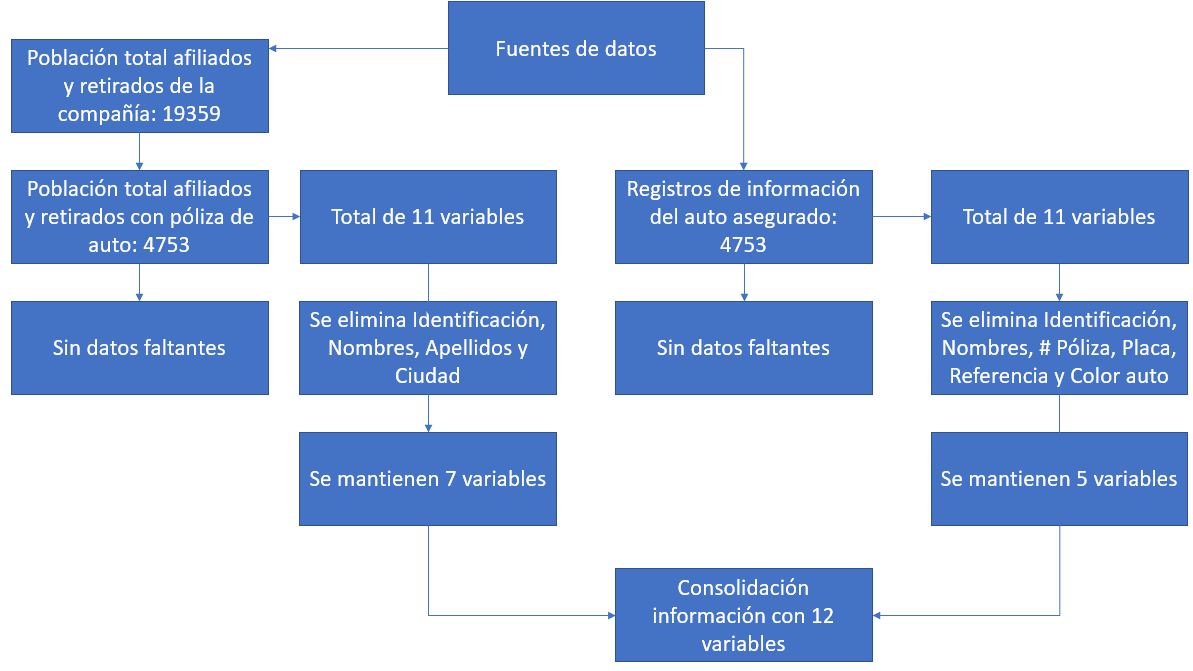

Para iniciar con el procesamiento y limpieza de la data se tiene por un lado la data sociodemográfica de afiliados y retirados de toda la compañía, es decir todas las personas afiliadas a alguna de las pólizas de seguro disponibles. Como primer paso se seleccionaron solo los individuos que están o estuvieron afiliadas a un seguro de automóvil. Al analizar el contexto del problema se decidió eliminar la variable ciudad ya que había una variable mucho más general llamada región que contenía menos categorías y podía ser más manejable. Adicionalmente se identificaron los registros con inconsistencias en variables como la edad y se procederá a eliminar el número de identificación de cada persona para anonimizar la información una vez hecho el cruce y consolidación de la información, así como sus nombres y apellidos. Finalmente para esta base permanecieron las siguientes variables

1.   Edad
2.   Estado civil
3.   Género
4.   Fecha de afiliación
5.   Región (Localización del usuario)
6.   Beneficiarios
7.   Póliza de vehículos (1 si seguía activo o 0 si se había presentado retiro)

Para la data de retirados no se presentaron inconsistencias significativas o datos faltantes, sin embargo es necesario hacer una unificación de las categorías en variables como la marca del vehículo ya que hay que categorías que por errores de digitación no tienen el mismo nombre a pesar de referirse al mismo tipo. Una vez realizado el cruce entre ambas bases se eliminará la identificación y datos de contacto como la placa y número de póliza, también nombres y apellidos e incluso variables que pueden tener menor relevancia como lo son la referencia del vehículo (con la marca es suficiente al ser más general) y su color. Por tanto las variables finales a tratar en esta base son

1.   Marca
2.   Modelo
3. Valor asegurado total
4. Prima media
5. Fecha de retiro

Una vez identificadas las características del asegurado y del vehículo que pueden ser relevantes para la consolidación respectiva se realizará la unión correspondiente de registros mediante el número de documento. Para las variables con ausencia de estandarización en sus categorías o problemas similares se hará el tratamiento requerido, esto sucede en categorías como el género y la marca del vehículo. Se adicionará también una variable dicotómica que indique si la persona está actualmente afiliada o retirada. Por último se utilizarán las variables Fecha de afiliación y Fecha de retiro para formar una única columna que se llame Antiguedad e indique en años el tiempo en que la persona ha permanecido o permaneció en la compañía. En base a todo lo realizado se tiene lo siguiente


In [3]:
import pandas as pd

EDAD = pd.Series(['Se presentaron 73 registros en donde la edad del asegurado oscilaba entre los 0 y los 16 años, lo cuál no tiene sentido, de hecho para varias de estas personas la edad era la misma que los años de antigüedad dentro de la compañía demostrando así que lo registrado no es la edad del asegurado. También se encuentran edades de 163 años por ejemplo, que llegan a ser inconsistentes con la naturaleza de la población'])

ESTADO = pd.Series(['No se presentan inconsistencias en esta variable, las categorías presentadas son CASADO, SOLTERO, UNIÓN LIBRE, VIUDO, DIVORCIADO, NO REGISTRA'])

GENERO = pd.Series(['Se requiere unificar algunas categorías en dónde aparecen valores como “.”, N y vacías, todas ellas deberían ser una misma categoría que indique no disponibilidad del género. Las categorías finales son F (Femenino), M (Masculino) y NO REGISTRA'])

ANTIGUEDAD = pd.Series(['Esta variable representa los años en que la persona lleva asociada a la compañía. No presenta inconcistencias y tiene un rango de 0 a 49 años'])

REGION = pd.Series(['Región que representa la ubicación de la persona, sus categorías son REGIÓN AMAZONÍA, CARIBE, ANDINA, ORINOQUÍA, PACÍFICA y REGIÓN NULA'])

BENEFICIARIOS = pd.Series(['Esta variable representa el número de beneficiarios total que tiene cada uno de los asegurados dentro de la compañía, independientemente de cuántos de estos beneficiarios sean exclusivamente de la póliza de vehículos'])

MARCA = pd.Series(['Marca del vehículo asegurado ya sea de una persona afiliada o retirada. Esta variable también requiere una estandarización de sus categorías, por ejemplo es necesario unificar valores como B.M.W y B.M.W.'])

MODELO = pd.Series(['El modelo del vehículo no presenta inconsistencias, sin embargo sí presenta datos faltantes, específicamente 22 registros'])

VALOR = pd.Series(['Esta variable no presenta inconsistencias, pero sí 15 datos faltantes'])

PRIMA = pd.Series(['Representa la prima a cancelar para afiliados y retirados, también presenta 15 datos faltantes'])

#FECHA = pd.Series(['Fecha de retiro para las personas que ya no tienen un producto de autos en la compañía. Cabe resaltar que esta variable estará en blanco para los registros de personas activas'])

SALIDA = pd.Series(['Variable dicotómica que presenta el valor de 1 si se refiere a una persona retirada y 0 en caso contrario'])

df = pd.DataFrame({'Edad': EDAD, 'Estado civil': ESTADO, 'Género': GENERO, 'Antiguedad': ANTIGUEDAD, 'Región': REGION,
                   'Beneficiarios': BENEFICIARIOS, 'Marca': MARCA, 'Modelo': MODELO, 'Valor asegurado': VALOR, 'Prima media': PRIMA, 'Salida': SALIDA})

df.style

,Edad,Estado civil,Género,Antiguedad,Región,Beneficiarios,Marca,Modelo,Valor asegurado,Prima media,Salida
0,"Se presentaron 73 registros en donde la edad del asegurado oscilaba entre los 0 y los 16 años, lo cuál no tiene sentido, de hecho para varias de estas personas la edad era la misma que los años de antigüedad dentro de la compañía demostrando así que lo registrado no es la edad del asegurado. También se encuentran edades de 163 años por ejemplo, que llegan a ser inconsistentes con la naturaleza de la población","No se presentan inconsistencias en esta variable, las categorías presentadas son CASADO, SOLTERO, UNIÓN LIBRE, VIUDO, DIVORCIADO, NO REGISTRA","Se requiere unificar algunas categorías en dónde aparecen valores como “.”, N y vacías, todas ellas deberían ser una misma categoría que indique no disponibilidad del género. Las categorías finales son F (Femenino), M (Masculino) y NO REGISTRA",Esta variable representa los años en que la persona lleva asociada a la compañía. No presenta inconcistencias y tiene un rango de 0 a 49 años,"Región que representa la ubicación de la persona, sus categorías son REGIÓN AMAZONÍA, CARIBE, ANDINA, ORINOQUÍA, PACÍFICA y REGIÓN NULA","Esta variable representa el número de beneficiarios total que tiene cada uno de los asegurados dentro de la compañía, independientemente de cuántos de estos beneficiarios sean exclusivamente de la póliza de vehículos","Marca del vehículo asegurado ya sea de una persona afiliada o retirada. Esta variable también requiere una estandarización de sus categorías, por ejemplo es necesario unificar valores como B.M.W y B.M.W.","El modelo del vehículo no presenta inconsistencias, sin embargo sí presenta datos faltantes, específicamente 22 registros","Esta variable no presenta inconsistencias, pero sí 15 datos faltantes","Representa la prima a cancelar para afiliados y retirados, también presenta 15 datos faltantes",Variable dicotómica que presenta el valor de 1 si se refiere a una persona retirada y 0 en caso contrario


4. Finalmente, después de todo el proceso de consolidación y limpieza se obtiene un total de 4753 registros.  A continuación se presenta el análisis descriptivo y exploratorio del conjunto de datos. La presentación de las visualizaciones y gráficas correspondientes son realizadas por la librería *dtale* tal como se muestra a continuación

In [ ]:
pip install --upgrade dtale

In [8]:
import dtale
import pandas as pd
import dtale.app as dtale_app
dtale_app.USE_COLAB = True

df = pd.read_excel('/Fuga Autos.xlsx')

dtale.show(df)


https://984ks4hnl3g-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/2

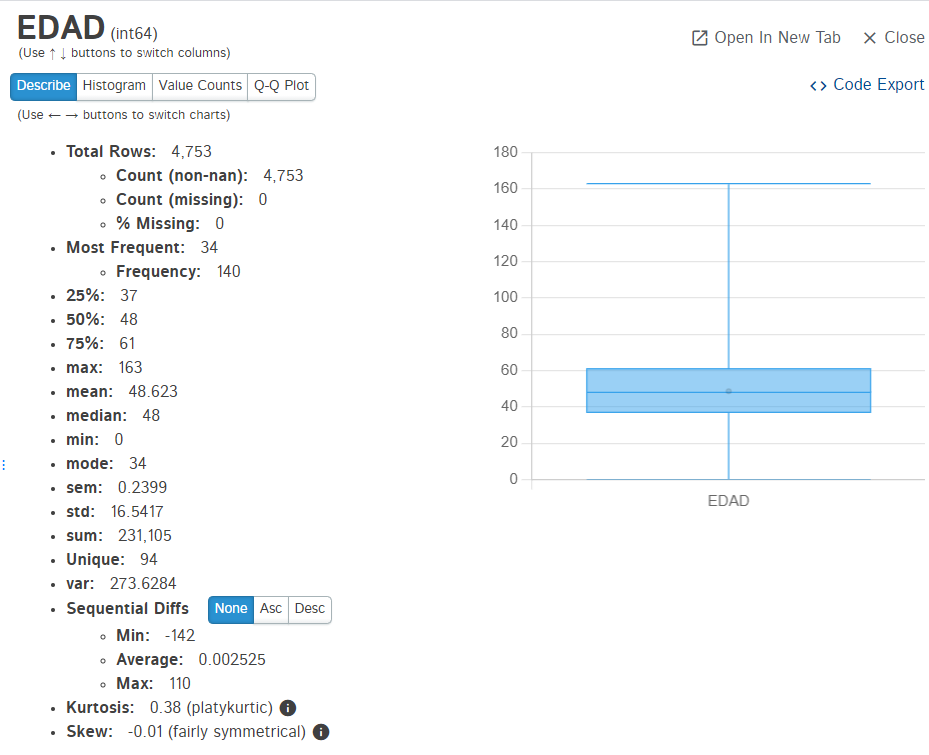

Para la primera variable EDAD se puede identificar que, como se había descrito, no se presenta ningún valor faltante, adicionalmente la edad más frecuente dentro de la población es 34 años. Como se expone en el boxplot no existe tanta dispersión entre el conjunto de datos en general, sin embargo hay datos atípicos que reflejan inconsistencia en la distribución de los mismos, como lo es por ejemplo la edad máxima presentada de 163 años, Para reconocer un poco mejor el patrón que rige el comportamiento de esta variable procedemos también a analizar el histograma respectivo

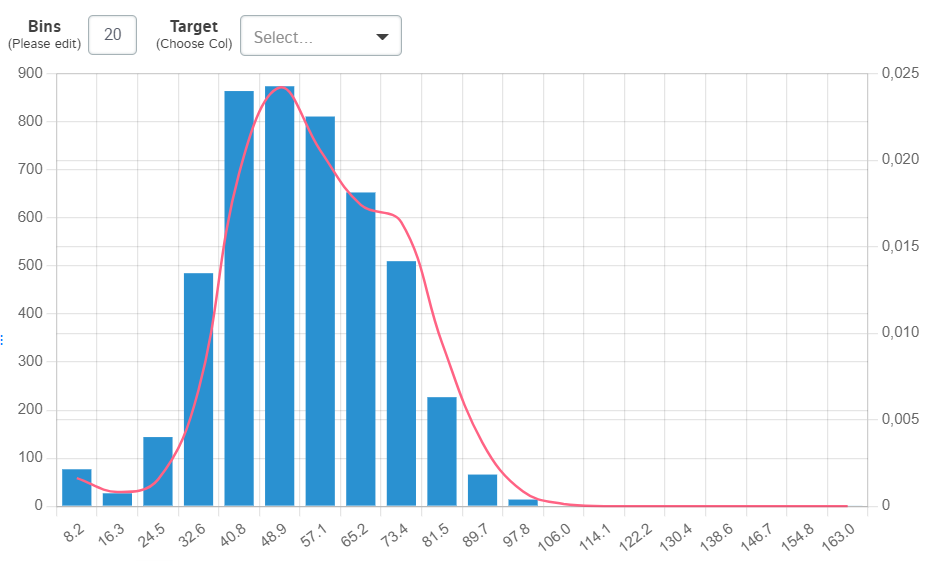

Se puede identificar con esta visualización que la distribución de la edad tiene algo de asimetría hacia la derecha indicando que estos datos no tienen un comportamiento similar al de una distribución normal. El pico de estos datos se encuentra entre 44 y 54 años, representando así que el grupo más frecuente de individuos se encuentra en ese rango. También se puede identificar los datos atípicos previamente mencionados, que a su vez evitan que se presente un comportamiento un poco más central en los datos y que por ejemplo la edad máxima sea 97 años que tendría más sentido.

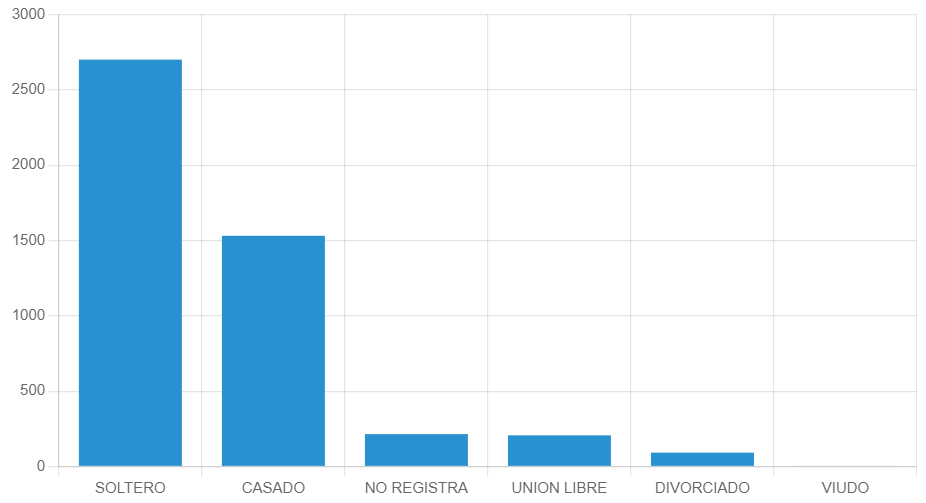

En cuanto al estado civil se puede identificar que más de 2700 personas del total de la población son solteros, lo cuál representa cerca del 50% del total de clientes, seguido de esto se encuentra una alta frecuencia de individuos pertenecientes al grupo de casados, con poco más de 1500 casos. Finalmente en una proporción similar se encuentran las categorías de No registra y personas en unión libre, seguidos de divoraciado y viudo con 92 y 5 casos respectivamente.

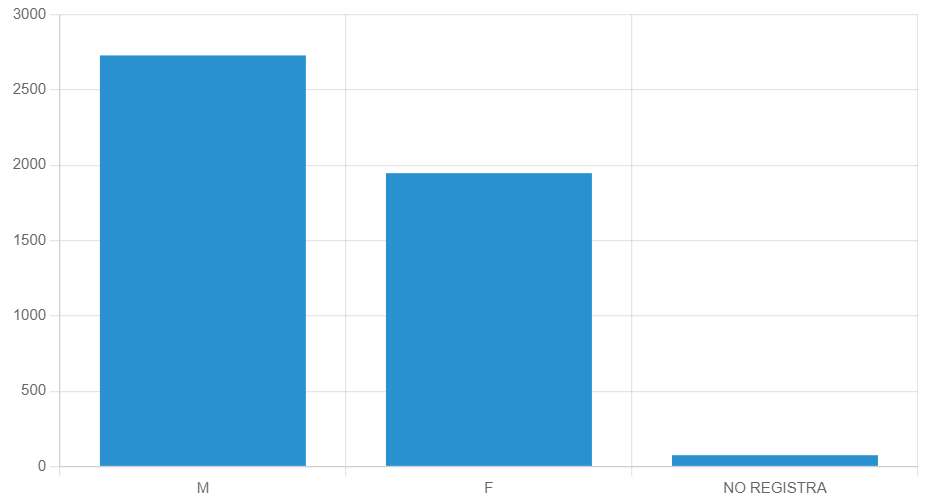

Para la variable género predomina el grupo de personas pertenecientes al género masculino con exactamente 2730 casos. A partir del diagrama de frecuencias se logra identificar que seguido del género masculino se encuentra el femenino con un poco menos de 2000 casos y los casos en donde no hubo registro, que son exactamente 75 personas

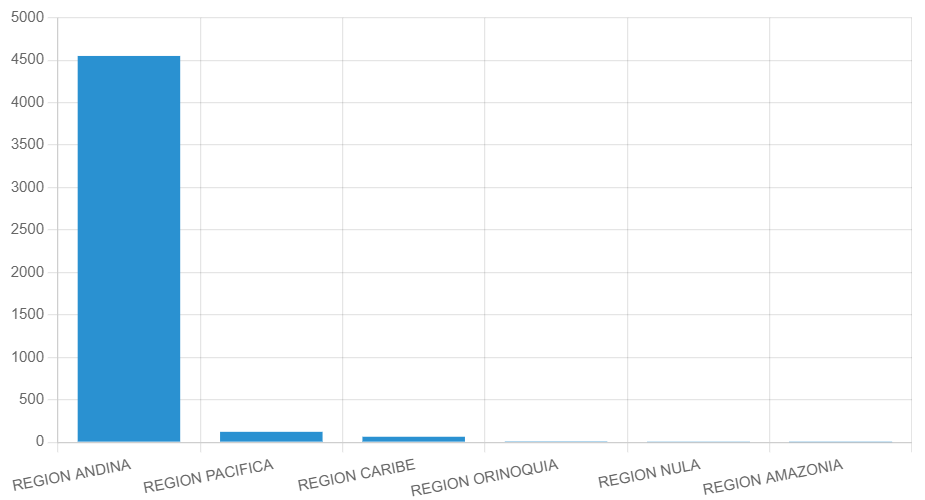

Posteriormente con la variable región se observa que el valor más frecuente pertenece a la región andina con más de 4500 personas con esta ubicación. En menor medida se encuentran las categorías de la región Pacífica, Caribe, Orinoquía y Amazonía. Adicional solo dos personas se encuentran dentro del grupo de Región Nula que indica que no hubo registro.

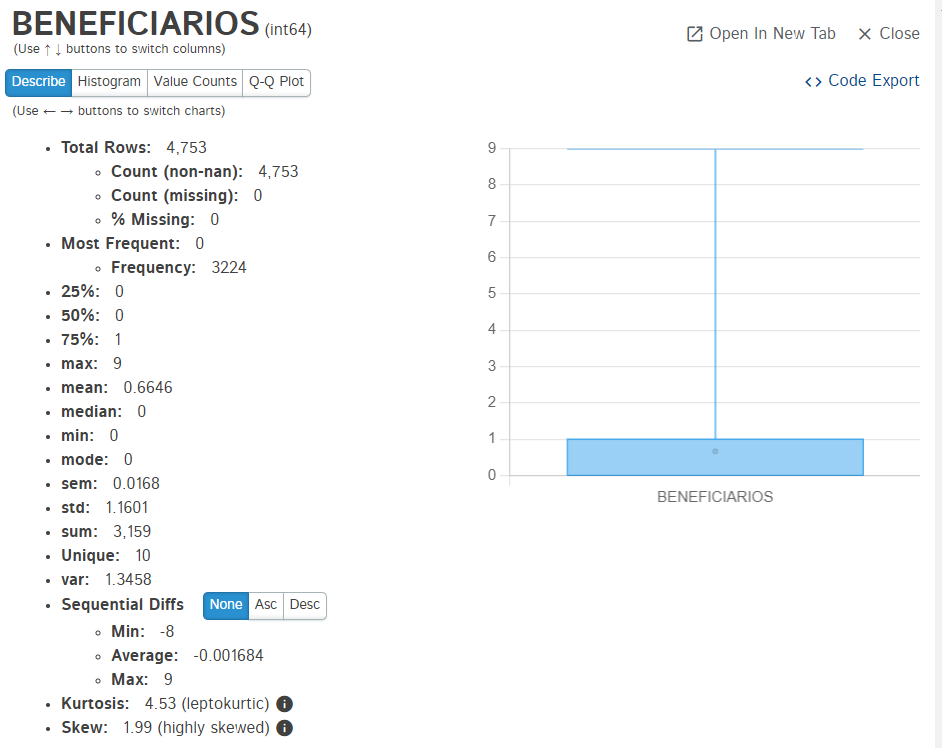

Se observa que para la variable beneficiarios más del 50% de la población no tiene ninguna persona asociada a su grupo familiar con esta característica. El diagrama de caja indica que hay poca dispersión entre los datos que se encuentran entre el 25% y 75% del conjunto total, sin embargo hay presencia de datos atípicos como el caso de la presencia de 9 beneficiarios influyendo así en la asimietría de la distribución correspondiente. Como se identifica en el histograma, dicha asimetría se presenta hacia la derecha y a partir del valor 1 en la variable las frecuencias disminuyen considerablemente 

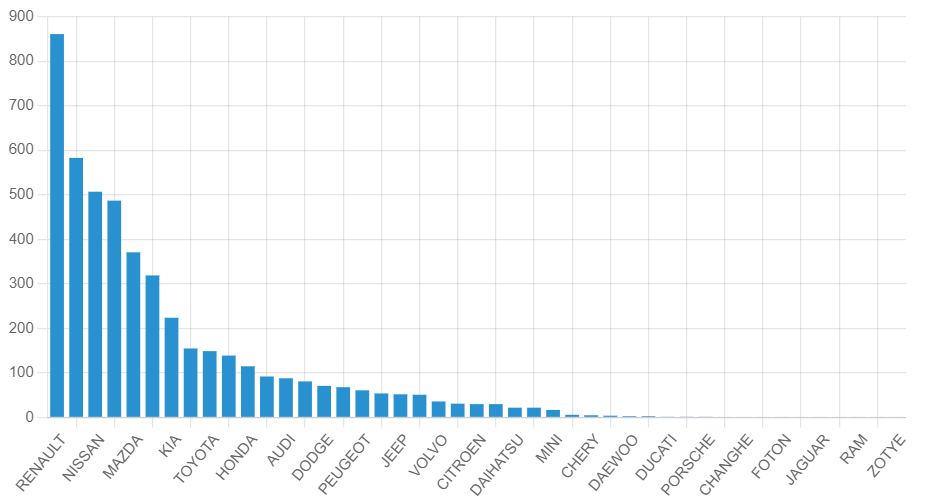

En cuanto a la marca del vehículo asegurado, esté activo o no, la categoría más frecuente es Renault, seguido de Chevrolet y Nissan con más de 500 asegurados, posteriormente Volkswagen, Mazda y Ford con más de 300 casos y en menor frecuencia se encuentran vehículos como Porsche, Jaguar o Volvo con 1 o 2 casos respecto al total 

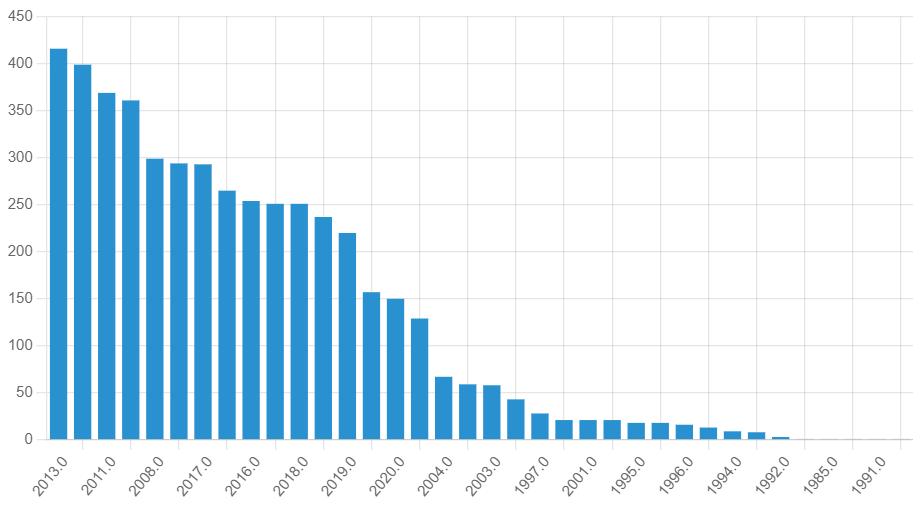

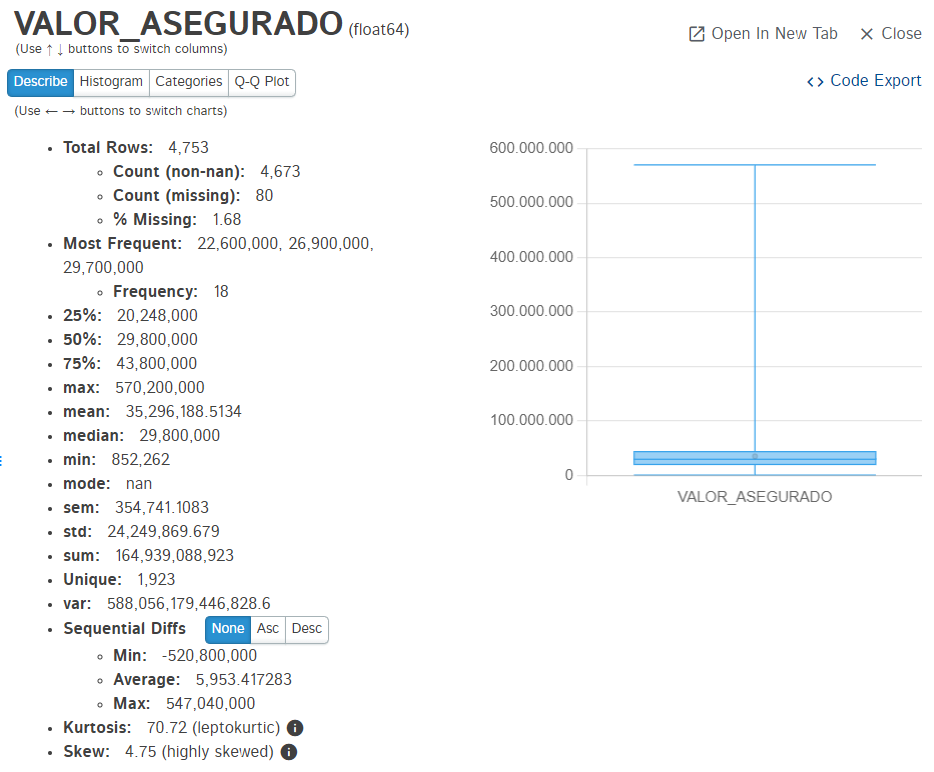

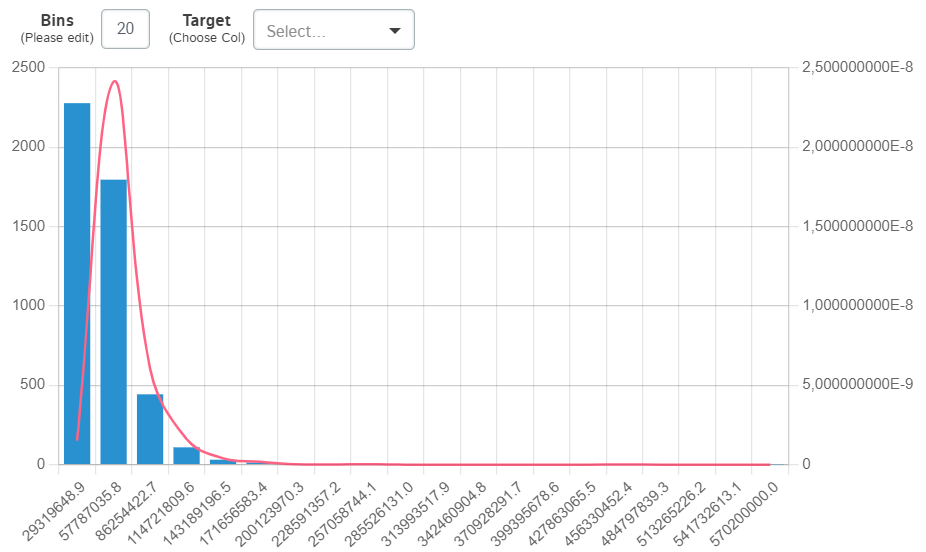

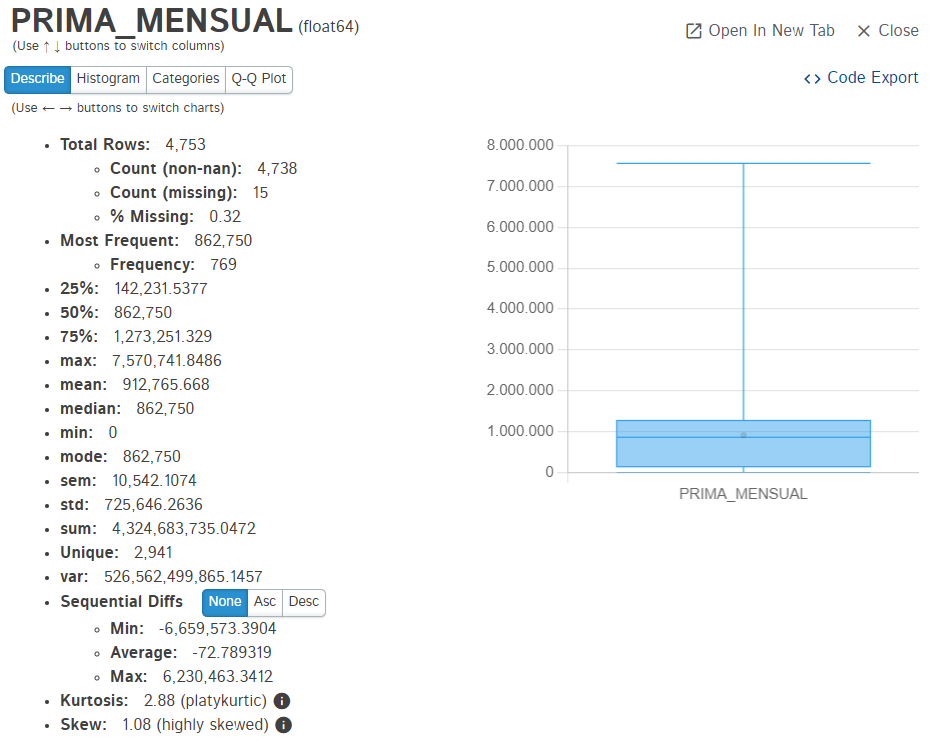

El modelo de vehículo más frecuente es 2013 y siendo menos comunes se encuentran modelos de la decada de los 80 o 90. Tanto para el valor asegurado como la prima media se puede observar que el impacto de sus datos atípicos es bastante significativo por lo que a pesar de ser valores poco dispersos su distribución presenta una asimetría. Para el caso del valor asegurado son más frecuentes los valores en un rango de 22 a 30 mill, sin embargo valores como los de 570 mill hacen que no haya consistencia o poca varianza entre el conjunton total. De la misma forma se puede observar que para los valores de la prima a cancelar a pesar de que la media es de un poco más de 900000, casos de más de 7 mill en primas influyen en la aparición de una distribución altamente sesgada, no obstante en el histograma parece visualizarse que puede ser también una distribución bimodal al tener la presencia de dos picos

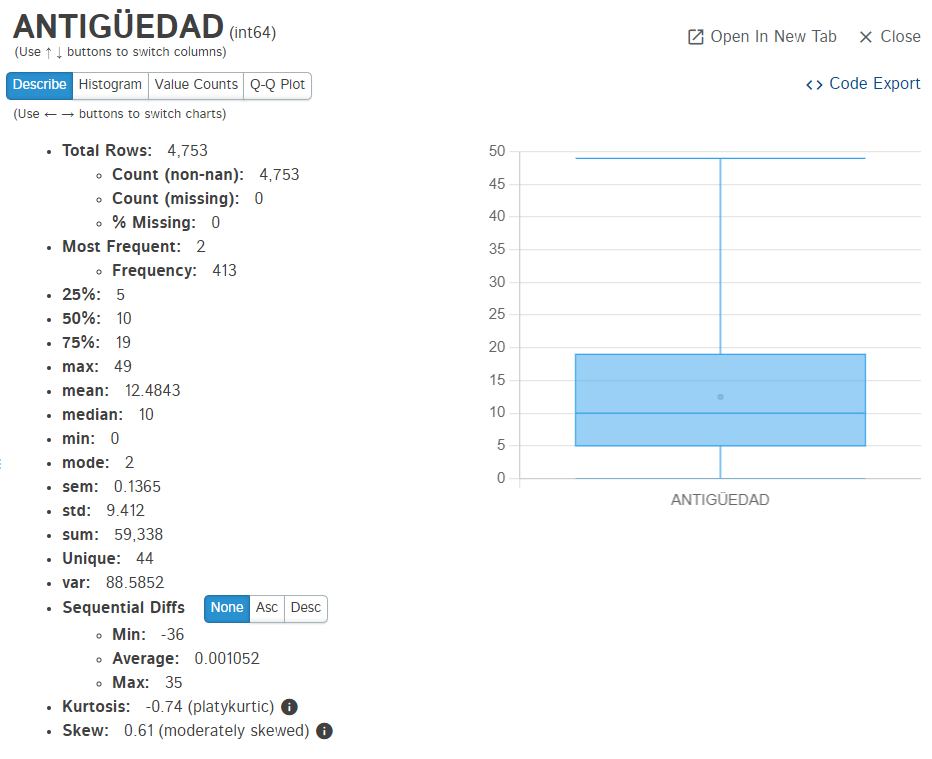

Para el caso de la variable antiguedad que indica los años en que la persona ha permanecido o permaneció en la compañía, la media es de 12 años, el máximo es de 49 y la duración más común es de 2 años. Nuevamente su boxplot e histograma indican que la presencia de asimetría a la derecha, sin embargo a diferencia de casos anteriores la presencia de outliers no parece ser tan influyente al punto de cambiar por completo la distribución de la variable. Finalmente para la variable dicótomica que indica la salida o permanencia de la persona con su afiliación de póliza de vehículo se observa que del total de la población de estudio 2932 personas sigue activas y 1821 se encuentran retiradas.

A partir de la exploración y descripción de los datos se puede identificar una gran presencia de outliers en las variables continuas tales como edad, valor asegurado o años de permanencia, y dicha presencia de outliers genera que las distribuciones correspondientes presentan una asimetría o sesgo, no obstante algunas de estos outliers tienen que ver con el contexto de la persona o del ítem asegurado, por ejemplo para vehículos de gama alta es muy probable encontrar primas que costeen su póliza de mucho más del promedio y también valores asegurados extremadamente altos. En otros casos los datos atípicos se deben más a un error de registro como por ejemplo valores de edad de más de 150 años. En general se puede determinar que un poco más del 60% del total de personas siguen activos con su póliza mientras que la proporción restante se ha retirado desde el año 2018, la edad promedio es de 48 años, no obstante debido a la presencia de datos atípicos esta edad no describe de manera exacta el promedio en la población, no obstante sí se puede identificar que la población en general es joven-adulta estando en un rango en su mayoría de 40 a 50 años. Debido a la alta frecuencia de edades jovenes se puede pensar que hay relación con que haya presencia en su mayoría de personas solteras, siendo este el estado civil de más del 50% de la población. Predomina el género masculino, individuos ubicados en la región Andina, probablemente habitantes de Bogotá, y adicionalmente los años de permanencia en la mayoría de casos es de menos de 2 años. 

También se puede reconocer que a mayor edad menor es el valor asegurado del vehículo, probablemente porque las personas adultas poseen en su mayoría autos de modelos pasados y por tanto menos valorizados, se puede identificar también que a mayor edad mayor la cantidad de beneficiarios e incluso que a mayor número de años del asegurado mayor es la antiguedad o años de permanencia en la compañía. 